In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print('TensorFlow version: {}'.format(tf.__version__))

TensorFlow version: 2.4.0


In [2]:
# We will use Fashion MNIST dataset. It contains 70,000 grascale images with 10 classes.
# We can acess the dataset directly from Tensorflow.
# The images are 28x28 NumPy arrays with pixel values ranging between 0 and 255 (grayscale).
# The labels are integeres between 0 and 9.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print("We have {} training example and {} test examples".format(train_images.shape[0], test_images.shape[0]))

We have 60000 training example and 10000 test examples


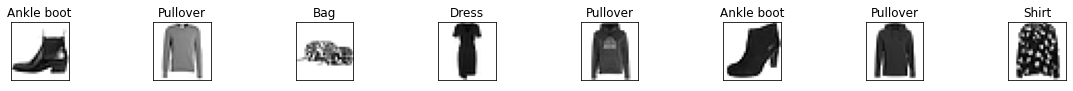

In [5]:
# lets visualize 5 random images with their labels
plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = np.random.randint(1, len(train_images))
    plt.imshow(train_images[j], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[j]])
plt.show()

In [6]:
# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
# define the model and plot its summary
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), filters=28 , kernel_size=2,
                       activation='relu', name='Conv1'),
    keras.layers.MaxPooling2D(pool_size=2, name='maxpooling'),
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation='relu', name='dense'),
    keras.layers.Dense(10,activation='softmax', name='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 27, 27, 28)        140       
_________________________________________________________________
maxpooling (MaxPooling2D)    (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 37864     
_________________________________________________________________
softmax (Dense)              (None, 10)                90        
Total params: 38,094
Trainable params: 38,094
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
# we will create imagedatagenerator
datagen =  keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,horizontal_flip = True, validation_split=0.2)
training_generator = datagen.flow(train_images, train_labels, batch_size=32,subset='training',seed=7)
validation_generator = datagen.flow(train_images, train_labels, batch_size=32,subset='validation',seed=7)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_generator= test_datagen.flow(test_images, test_labels, batch_size=32)


In [11]:
epochs=10
history = model.fit(training_generator,steps_per_epoch=(len(train_images)*0.8)//64, epochs=epochs, validation_data=validation_generator, validation_steps=(len(train_images)*0.2)//32)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3553 - accuracy: 0.8763 - val_loss: 0.3977 - val_accuracy: 0.8584
Epoch 2/10
750/750 [==============================] - 6s 9ms/step - loss: 0.3572 - accuracy: 0.8750 - val_loss: 0.3487 - val_accuracy: 0.8817
Epoch 3/10
750/750 [==============================] - 6s 9ms/step - loss: 0.3413 - accuracy: 0.8835 - val_loss: 0.3473 - val_accuracy: 0.8783
Epoch 4/10
750/750 [==============================] - 6s 9ms/step - loss: 0.3295 - accuracy: 0.8851 - val_loss: 0.3497 - val_accuracy: 0.8787
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3252 - accuracy: 0.8868 - val_loss: 0.3379 - val_accuracy: 0.8814
Epoch 6/10
750/750 [==============================] - 6s 9ms/step - loss: 0.3193 - accuracy: 0.8880 - val_loss: 0.3394 - val_accuracy: 0.8813
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3115 - accuracy: 0.8895 - val_loss: 0.3278 - val_accuracy: 0.8857
Epoch 

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print('\nTest accuracy: {}'.format(test_acc*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8832

Test accuracy: 88.31999897956848


In [14]:
model.save("my_fashion_model")

INFO:tensorflow:Assets written to: my_fashion_model/assets


In [15]:
from tensorflow.keras.models import load_model

# give the path to model directory to load the model
loaded_model = load_model('my_fashion_model/')

In [16]:
# predict function to predict the probabilities for each class 0-9
loaded_model.predict(test_images[6:7])

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# predict_classes to get the class with highest probability 
np.argmax(loaded_model.predict(test_images[6:7]))

4